# Transfer function

Calculate and analyse transfer function of a damped mechanical oscillator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Oscillator parameters:

In [2]:
mass = 2
k_const = .55
attenuation = -0.3

In [3]:
def osc_parameters(m, k, b):
    if b != 0:
        tau0 = 2.*m/b
        print("Decay time: " + str(tau0))
    f0 = (1/2.*np.pi)*np.sqrt(k/m)
    print("Natural frequency: " + str('%.3f' % f0))
    fd = (1/2.*np.pi)*np.sqrt((k/m)*(1.-b*b/(4.*k*m)))
    print("Oscillation frequency: " + str('%.3f' % fd))

def g(tau, m, k, b):
    '''
    Impulse response of a damped oscillator.
    m = oscillator mass
    k = elastic constant
    b = attenuation factor
    '''
    f0 = (1/2.*np.pi)*np.sqrt(k/m)
    fd = (1/2.*np.pi)*np.sqrt((k/m)*(1.-b*b/(4.*k*m)))
    if b == 0:
        e = 1
    else:
        tau0 = 2.*m/b
        e = np.exp(tau/tau0)
    return e*np.sin(2.*np.pi*fd*tau)

## 2. Oscillator characteristics

In [4]:
osc_parameters(mass, k_const, attenuation)

Decay time: -13.333333333333334
Natural frequency: 0.824
Oscillation frequency: 0.815


## 3. Calculate the transfer function from the impulse response

In [5]:
xtime = np.linspace(0,50,10240)
y = g(xtime, mass, k_const, attenuation)

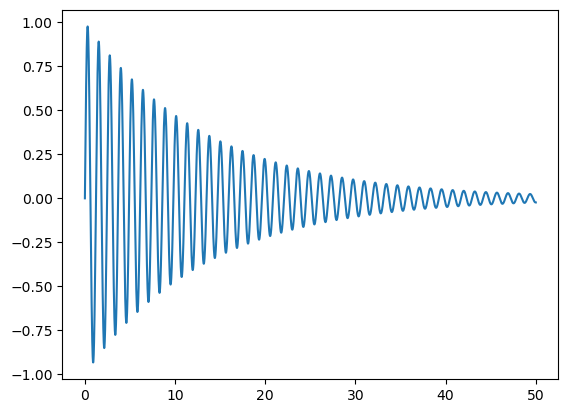

In [6]:
plt.plot(xtime, y)

In [7]:
from scipy.fft import fft, fftfreq

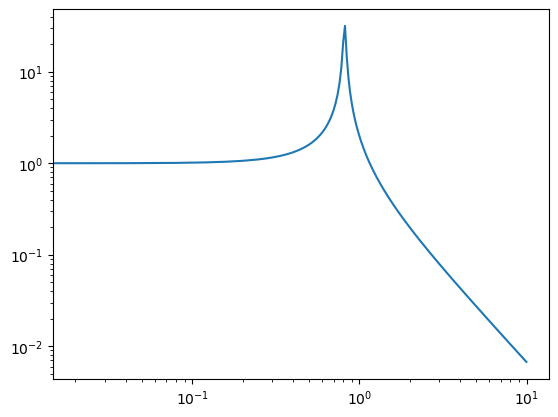

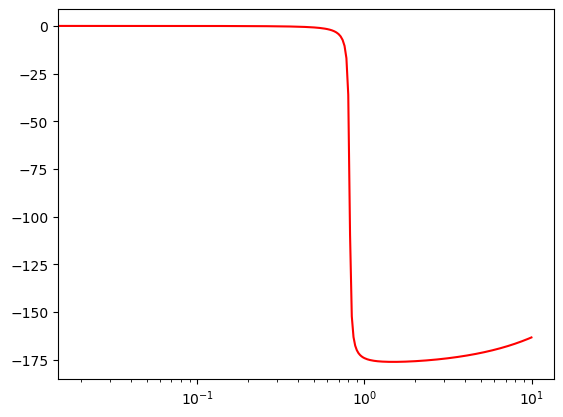

In [8]:
fftr = fft(y)

freq = fftfreq(xtime.shape[-1], d=(xtime[-1]-xtime[0])/xtime.shape[-1])

zero_freq = int(xtime.shape[-1]/2)

max_index = 500
if max_index > zero_freq: max_index = zero_freq

plt.loglog(freq[0:max_index], abs(fftr)[0:max_index]/abs(fftr)[1])  # Normalized magnitude
plt.show()

phase_deg = np.arctan2(fftr.imag,fftr.real)[0:max_index]*180./np.pi
plt.semilogx(freq[0:max_index], phase_deg, color="red")  # Phase

# Improve the FFT by using windowing

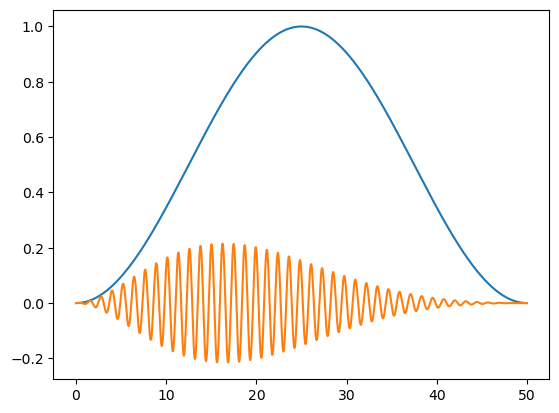

In [9]:
from scipy.signal import windows

wind = windows.hann(len(y))
yw = y*wind

plt.plot(xtime, wind)

plt.plot(xtime, yw)

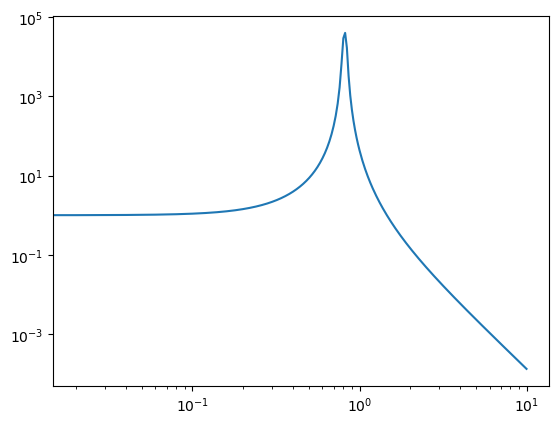

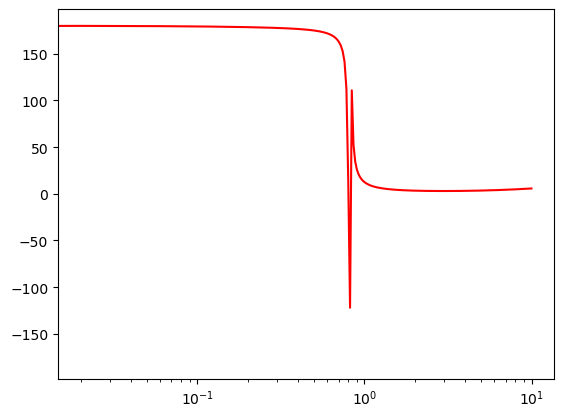

In [10]:
fftr = fft(yw)

freq = fftfreq(xtime.shape[-1], d=(xtime[-1]-xtime[0])/xtime.shape[-1])

zero_freq = int(xtime.shape[-1]/2)

max_index = 500
if max_index > zero_freq: max_index = zero_freq

plt.loglog(freq[0:max_index], abs(fftr)[0:max_index]/abs(fftr)[1])  # Normalized magnitude
plt.show()

phase_deg = np.arctan2(fftr.imag,fftr.real)[0:max_index]*180./np.pi
plt.semilogx(freq[0:max_index], phase_deg, color="red")  # Phase

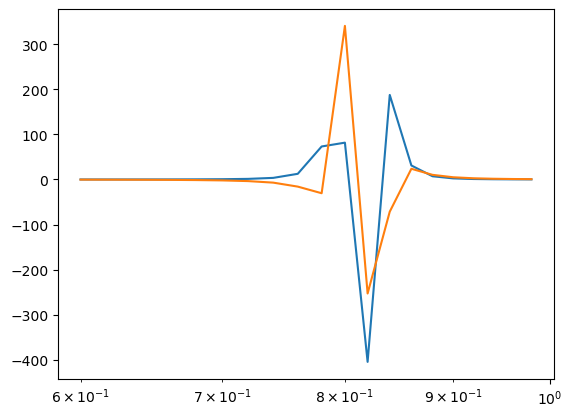

In [11]:
# Numerical errors are still visible in the resonance region

#plt.loglog(freq[30:50], fftr.imag[30:50], freq[30:50], fftr.real[30:50])
plt.semilogx(freq[30:50], fftr.imag[30:50], freq[30:50], fftr.real[30:50])

# Play with parameters to understand better the undelying mechanism!